In [1]:
#显示图片
def plt_bboxes(img,  ratio, bboxes, figsize=(10,10), linewidth=1.5):
    """Visualize bounding boxes. Largely inspired by SSD-MXNET!
    """
    fig = plt.figure(figsize=figsize)
    plt.imshow(img)
    height = img.shape[0]
    width = img.shape[1]
    colors = dict()
    cls_id = 0
    if cls_id not in colors:
        colors[cls_id] = (random.random(), random.random(), random.random())
        print(colors)
    ymin = int(bboxes[0][0][0] /ratio[0])
    xmin = int(bboxes[0][0][1] /ratio[1])
    ymax = int(bboxes[0][0][2] /ratio[0])
    xmax = int(bboxes[0][0][3] /ratio[1])
    print(ymin, xmin, ymax, xmax)
    rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                 ymax - ymin, fill=False,
                                 edgecolor=colors[cls_id],
                                 linewidth=linewidth)
    plt.gca().add_patch(rect)
    #plt.gca().text(xmin, ymin - 2,
         #                  '{:s} | {:.3f}'.format(class_name, score),
        #                   bbox=dict(facecolor=colors[cls_id], alpha=0.5),
         #                  fontsize=12, color='white')
    plt.show()

/data/liuan/miniconda2/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/liuan/miniconda2/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/liuan/miniconda2/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/liuan/miniconda2/envs/tf/lib/python3.6/site-packages

Tensor("x:0", shape=(?, 40, 200, 3), dtype=float32)
Tensor("fc/Relu:0", shape=(?, 4), dtype=float32)
/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/001103_fz.jpg
[1.3333334 1.8181819]
{0: (0.08528501076778061, 0.8454850821347724, 0.43078527755993656)}
9 7 26 91


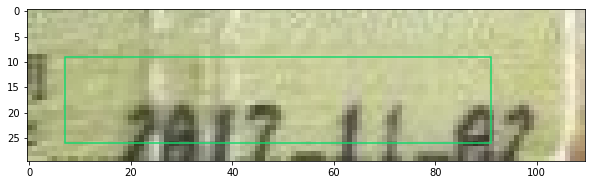

0.0006573200225830078 2.2037107944488525
/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/001107_zc.jpg
[1.25      1.9230769]
{0: (0.3912516765368875, 0.22585768545454166, 0.5164144239171905)}
9 6 27 86


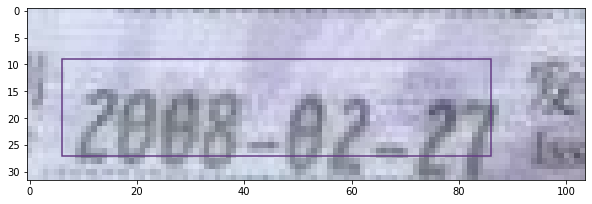

0.001220703125 0.0028069019317626953
/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/000613_fz.jpg
[0.6451613  0.86580086]
{0: (0.5345361013837635, 0.9244982050018825, 0.9480992715959122)}
19 17 53 192


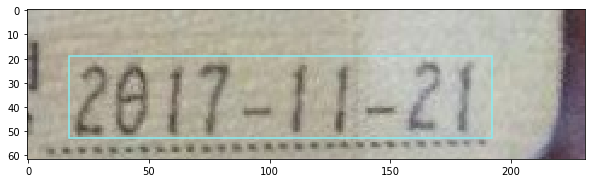

0.0006072521209716797 0.0025129318237304688
/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/001101_zc.jpg
[0.8       1.0582011]
{0: (0.5899961763539179, 0.6600400398200894, 0.49131467688476727)}
14 11 42 157


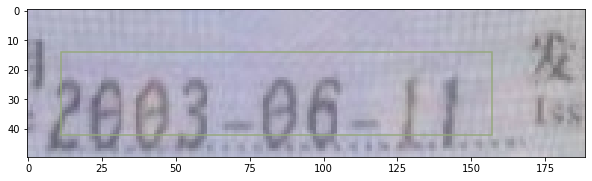

0.0008764266967773438 0.0019228458404541016
/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/001104_zc.jpg
[1.3793104 1.8867924]
{0: (0.42487127800017865, 0.14993740279207657, 0.8246483177137797)}
8 6 24 89


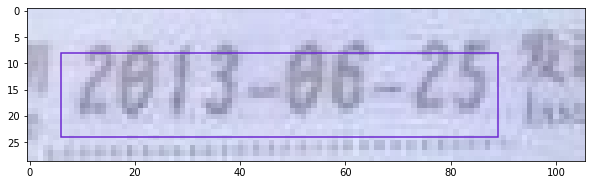

0.0006403923034667969 0.0020067691802978516
/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/001103_zc.jpg
[1.3333334 1.8181819]
{0: (0.5425676254376618, 0.9736350137197942, 0.3683658701874907)}
9 6 25 91


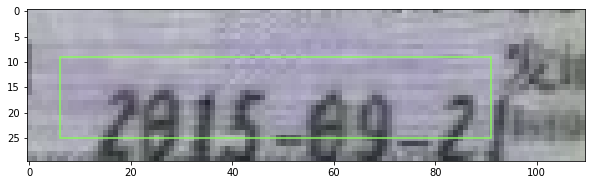

0.0007121562957763672 0.0015716552734375
/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/000602-Copy1_fz.jpg
[0.754717  1.0256411]
{0: (0.737375947403138, 0.06963657710228499, 0.8492439388304776)}
15 13 45 161


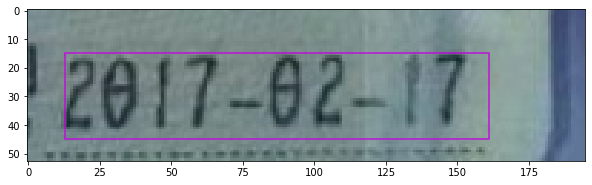

0.00048661231994628906 0.0019371509552001953
/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/001105_zc.jpg
[0.7692308 1.3793104]
{0: (0.20043232484676288, 0.8638354478560968, 0.832114464488344)}
15 9 44 120


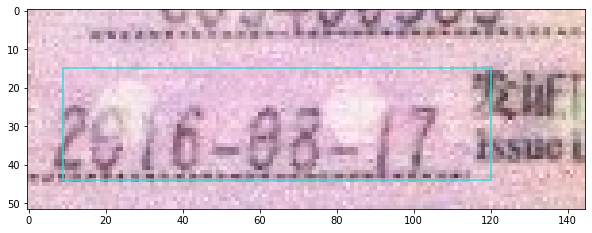

0.000949859619140625 0.002229928970336914
/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/001105_fz.jpg
[0.8888889 1.369863 ]
{0: (0.764846167268201, 0.02246918017745958, 0.4233918587777611)}
13 9 37 122


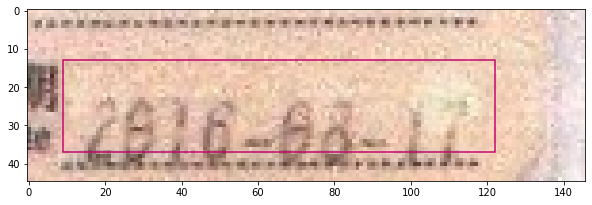

0.0007829666137695312 0.002036571502685547


In [2]:
#测试pb
# pb

import tensorflow as tf
import matplotlib.pyplot as plt
import random
import os
import time
import cv2
import numpy as np

# 设置可见GPU
gpu_no = '3' # or '1'
os.environ["CUDA_VISIBLE_DEVICES"] = gpu_no
#定义TensorFlow配置
config = tf.ConfigProto()
#配置GPU内存分配方式
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.3


test_img_path = '/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/dataset/testdata/'
pb_model_path = '/data/liuan/jupyter/root/project/keras-retinanet-master/bbox_fz_zc/bbox_pb_model/ocr_bboxregress_batch16_epoch10000.pb'
test_img_list = os.listdir(test_img_path)

h=40
w=200  #归一化的尺寸
c=3  

with tf.Graph().as_default():
    output_graph_def = tf.GraphDef()
    with open(pb_model_path, "rb") as f:
        output_graph_def.ParseFromString(f.read())
        _ = tf.import_graph_def(output_graph_def, name="")
    with tf.Session(config=config) as sess:
        init = tf.global_variables_initializer()
        sess.run(init)
        input_x = sess.graph.get_tensor_by_name("x:0")
        print(input_x)
        output_coor = sess.graph.get_tensor_by_name("fc/Relu:0")
        print(output_coor)
        prob = sess.graph.get_tensor_by_name("keep_prob:0")
        for image_name in test_img_list:
            image_path = os.path.join(test_img_path,image_name)
            print(image_path)
            start_time = time.time()
            img = cv2.imread(image_path)
            image= cv2.resize(img,(w,h))
     
            np_image = np.asarray(image,np.float32)
            np_image_resize = np.reshape(np_image,(1,h,w,3))
            time_consuming_1 = time.time() - start_time
            start_time_2 =  time.time()
            _output_coor = sess.run([ output_coor], feed_dict={input_x:np_image_resize, prob:0})
            time_consuming_2 = time.time() - start_time_2
            
            ratio = np.array([image.shape[0]/img.shape[0], image.shape[1]/img.shape[1]],np.float32) #height缩放比 ,width 缩放比
            print(ratio)
            plt_bboxes(img,  ratio, _output_coor, figsize=(10,10), linewidth=1.5)
            print(time_consuming_1,time_consuming_2)
            
           
            